# **Exploratory data analysis (EDA) de SmartBakery**

![](imgs/SmartBakery.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px
plt.style.use('fivethirtyeight')

In [2]:
df_clean = pd.read_csv('../data/prep/data_bakery_prep.csv', index_col=0)
df_clean.head()

Date   Time  Transaction_id                  Menu  Quantity  \
Unnamed: 0                                                                      
0           2021-01-02  08:38          150040              Baguette         1   
1           2021-01-02  08:38          150040      Pain Au Chocolat         3   
4           2021-01-02  09:14          150041      Pain Au Chocolat         2   
5           2021-01-02  09:14          150041                  Pain         1   
8           2021-01-02  09:25          150042  Traditional Baguette         5   

            Price  Revenue  Week_day  Day  Year    Month Quarter Day_time  
Unnamed: 0                                                                 
0            0.90     0.90  Saturday    2  2021  2021-01  2021Q1  Morning  
1            1.20     3.60  Saturday    2  2021  2021-01  2021Q1  Morning  
4            1.20     2.40  Saturday    2  2021  2021-01  2021Q1  Morning  
5            1.15     1.15  Saturday    2  2021  2021-01  2021Q1  Morning  
8            1.20     6.00  Saturday    2  2021  2021-01  2021Q1  Morning

## Identificación de outliers

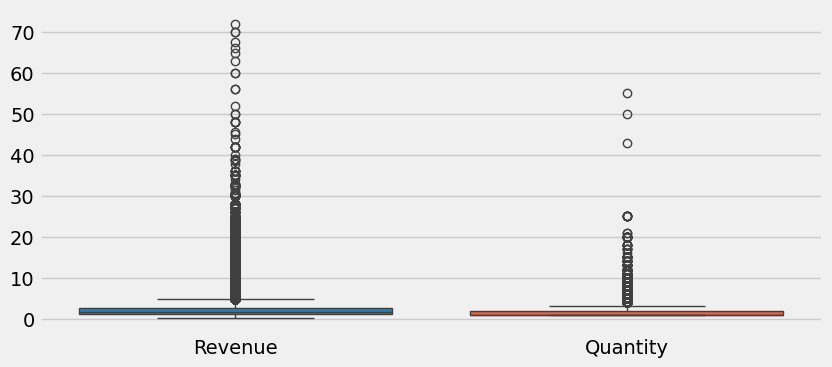

In [3]:
# Identifica outliers
plt.figure(figsize = (9, 4))
outlier = pd.DataFrame(data=df_clean, columns = ['Revenue', 'Quantity'])
sns.boxplot(data=outlier)
plt.show()

En la primera versión de este EDA observamos ourliers con valores negativos y otros con más de cien panes vendidos. 
Se decidio eliminar los outliers en el módulo de preprocesamiento.

## Heatmap de correlaciones

A continuación, se muestra la correlación existente entre las variables disponibles en el dataset.

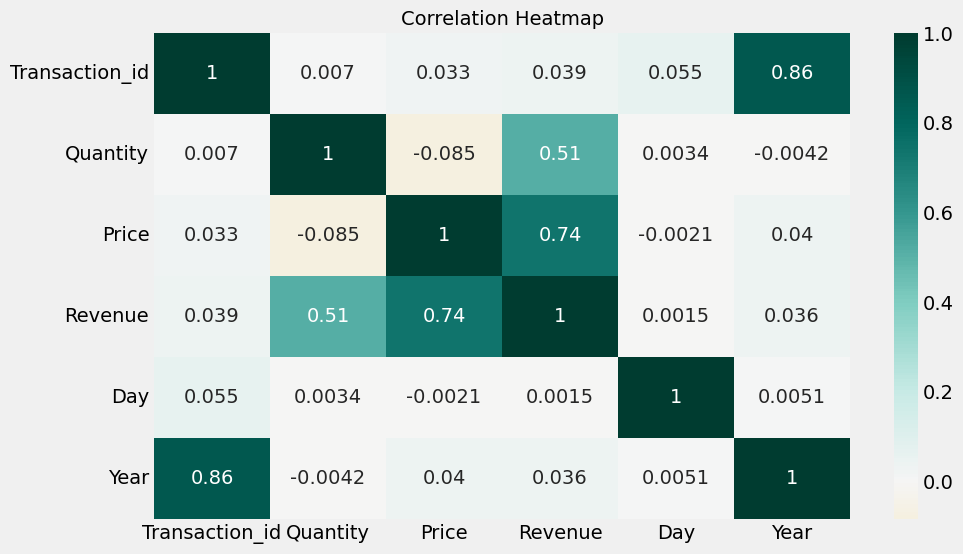

In [5]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='BrBG', center=0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14})
plt.show()

## Análisis de variables

Adicionalmente, mostramos los artículos más vendidos en 2021 y 2022 en los siguientes gráficos:

In [6]:
# Best Selling Menu Items
fig = px.treemap(data_frame=df_clean, 
                path=[px.Constant('<b> Menu Items'), 
                      'Menu'], 
                title = '<b> Best Selling Menu Items (2021 & 2022)',
                values= 'Quantity')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')
 
fig.update_layout(treemapcolorway = ['burlywood', 'cadetblue'], 
                  margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()


#  Most Profitable Menu Items
fig = px.treemap(data_frame=df_clean, 
                path=[px.Constant('<b> Menu Items'), 
                      'Menu'], 
                title = '<b> Most Profitable Menu Items (2021 & 2022)',
                values='Revenue')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')
 
fig.update_layout(treemapcolorway = ['slateblue', 'peachpuff'], 
                  margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()

Como otro análisis mostramos los ingresos obtenidos por año y mes:
 - Se identifica que mes y año tuvo más ingresos a través del primer gráfico.
 - Se muestra una serie de tiempo del comportamiento del ingreso durante el periodo análizado.

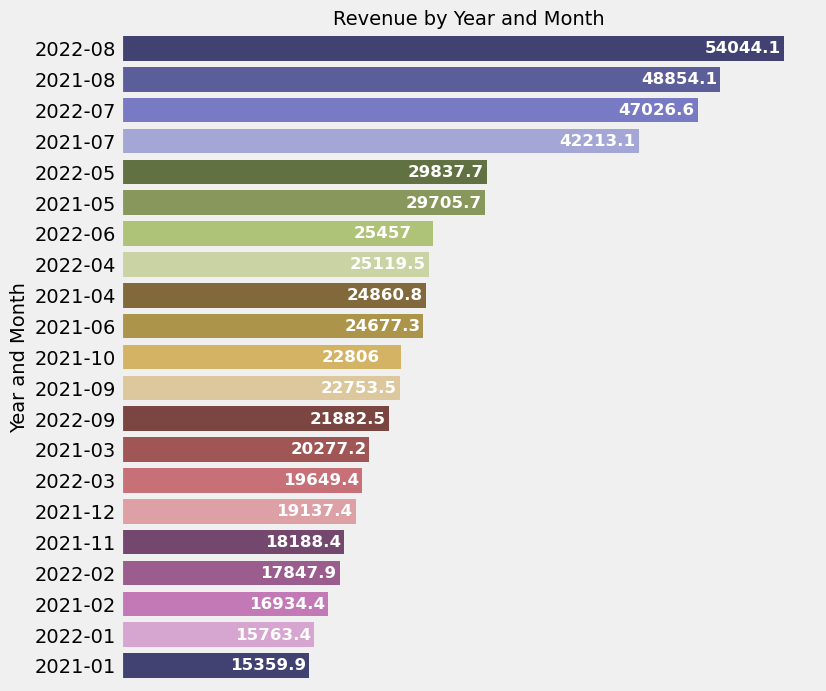

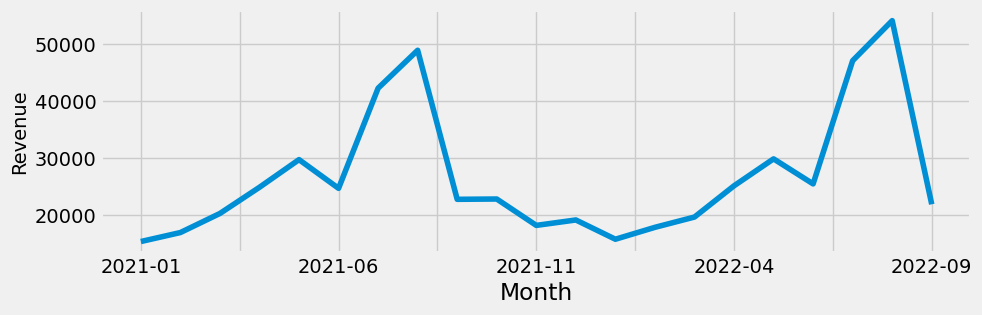

In [9]:
# Revenue by Month
rev_month = df_clean.groupby(['Month'])['Revenue'].sum()\
                                            .reset_index()\
                                            .sort_values(by='Revenue', ascending=False)

# Asegúrate de que la paleta tenga suficientes colores
num_months = rev_month['Month'].nunique()
color = sns.color_palette('tab20b', n_colors=num_months)

fig = plt.figure(figsize=(8,8))
ax = sns.barplot(data=rev_month, x='Revenue', y='Month', hue='Month', palette=color, orient='h', dodge=False)

for i in ax.containers:
    ax.bar_label(i, padding=-57, color='white', 
                 fontsize=12, label_type='edge',
                 fontweight='bold')

plt.ylabel('Year and Month', size=14)
plt.title('Revenue by Year and Month', size=14)

ax.spines[['right', 'top', 'bottom']].set_visible(False) 
ax.xaxis.set_visible(False)
plt.show()

plt.figure(figsize=(10,3))
df_clean.groupby(['Month'])['Revenue'].sum().plot()
plt.ylabel('Revenue', size=14)
plt.show()


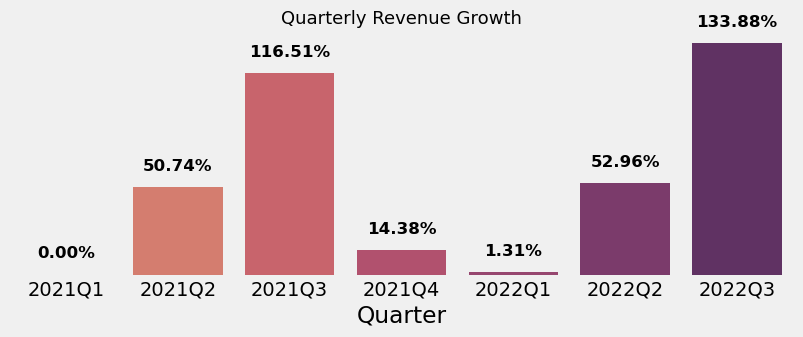

In [12]:
# Quarterly Revenue Growth
rev_quarter = df_clean.groupby(df_clean['Quarter'])['Revenue'].sum()
rev_growth = (rev_quarter / rev_quarter.iloc[0] - 1) * 100

# Asegúrate de que la paleta tenga suficientes colores
num_quarters = rev_quarter.index.nunique()
color = sns.color_palette('flare', n_colors=num_quarters)

fig = plt.figure(figsize=(9, 3))
ax = sns.barplot(data=rev_growth.reset_index(), x='Quarter', y='Revenue', hue='Quarter', palette=color, dodge=False)

for i in ax.containers:
    ax.bar_label(i, padding=10, color='black', fontsize=12, label_type='edge', fontweight='bold', fmt='%.2f%%')

plt.title('Quarterly Revenue Growth', size=13)

ax.spines[['left', 'top', 'bottom']].set_visible(False)
ax.yaxis.set_visible(False)
plt.show()

In [13]:
# Revenue by Day
profitable_menu = df_clean.groupby('Week_day').sum(numeric_only=True)['Revenue'].sort_values(ascending=False)

fig = px.bar(profitable_menu, 
             color=profitable_menu, 
             color_continuous_scale=px.colors.sequential.YlGnBu)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Revenue by Day (2021 & 2022)', title_x = 0.5, 
                  titlefont=dict(size=20), 
                  xaxis_tickangle=-0, 
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white', 
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True, 
                 title='<b> Revenue')
fig.update_xaxes(title='<b> Day')
fig.update_traces(texttemplate='%{y}', 
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br>Revenue: %{y}')
fig.show()

In [14]:
# Most Purchased Items by Date
fig = px.treemap(data_frame=df_clean, 
                path=[px.Constant('<b> Date in Each Year and Month'), 
                      'Month', 
                      'Day'], 
                title = '<b> Most Purchased Items by Date (2021 & 2022)',
                values='Quantity')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')
 
fig.update_layout(treemapcolorway = ['brown', 'coral'], 
                  margin = dict(t=70, b=10, l=20, r=20))

fig.layout.hovermode = False
fig.show()

In [15]:
# Day of time distribution
fig = px.scatter(df_clean, x='Quantity', y='Time', color='Day_time')
fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Day of Time (2021 & 2022)', title_x = 0.5, 
                  titlefont=dict(size=20))
fig.show()